# Spacesaver-ML-Project

## Understanding the problem statement

## observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

## Dataset link-https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv

In [1]:
## importing essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## loading the dataset 

In [2]:
## loading the dataset :
data=pd.read_csv('spacesaver.csv')

In [3]:
## lets check the first five records :
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
## lets check the last five records :
data.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


## EDA Process

In [5]:
data.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [6]:
## total information of the dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [7]:
## lets check the column names :
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [8]:
data.drop('rerun',axis=1,inplace=True)

In [9]:
## lets check the nullvalues :
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

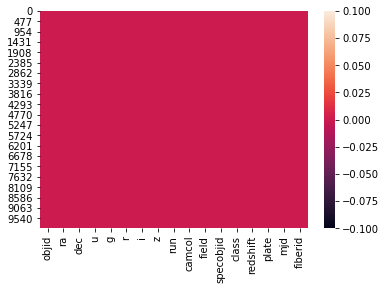

In [10]:
sns.heatmap(data.isnull())

## Stastical Analysis

In [11]:
## stastical analysis of all featues with min max mean std :
data.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


## Correlation matrix

In [12]:
## corelation between all the features :
dfr=data.corr()
dfr

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
camcol,1.921887e-15,-6.293831e-03,1.146139e-01,9.944672e-03,1.022304e-02,1.074725e-02,1.346079e-02,1.092981e-02,1.518143e-01,1.000000e+00,-6.792055e-02,4.080943e-02,6.833537e-03,4.079461e-02,2.628396e-02,5.356292e-01


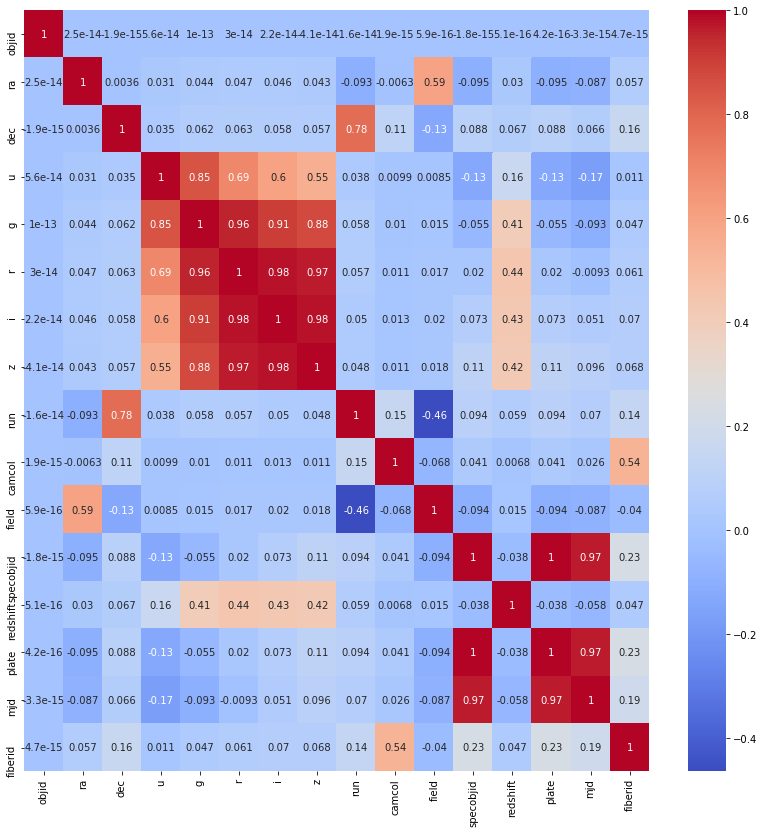

In [13]:
plt.figure(figsize=(14,14))
sns.heatmap(dfr,annot=True,cmap='coolwarm')
plt.show()

## Coverting catagorical values to numerical

In [14]:
## importing the labelencoder to convert object datatypes to numerical values :
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
## coverting catagorical values to numerical :
data['class']=le.fit_transform(data['class'])

In [16]:
data['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

In [17]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512


In [18]:
## lets check skewness in the dataset :
data.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [19]:
## lets treat the skewness in the input dataset :
import numpy as np
for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.log1p(data[index])
    if data.skew().loc[index]<-0.5:
        data[index]=np.square(data[index])

C:\Users\sagar\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
data.skew()

objid        0.000000
ra           0.104821
dec          0.152301
u           -1.091292
g           -0.360026
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    0.696181
class        0.169292
redshift     3.513844
plate        0.696680
mjd          1.011097
fiberid      0.308053
dtype: float64

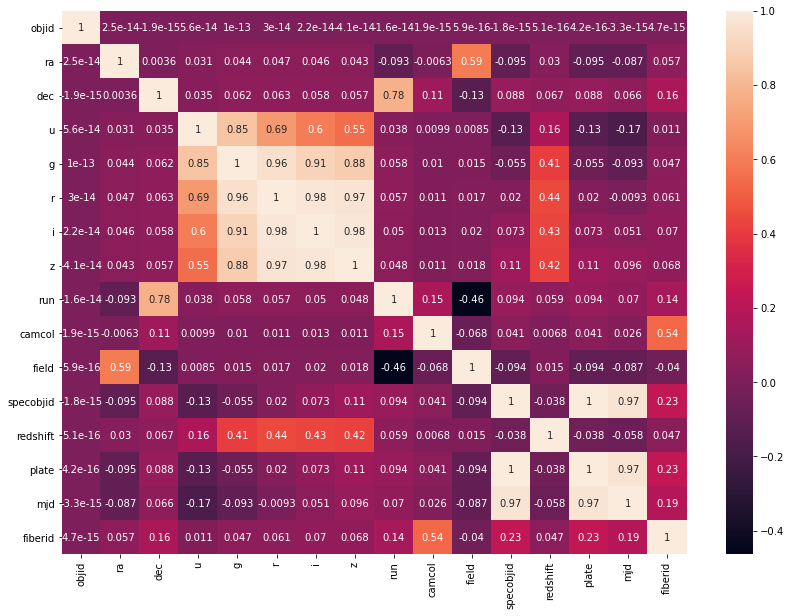

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(dfr,annot=True)
plt.show()

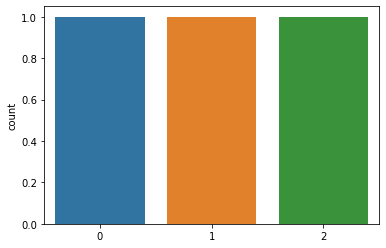

In [22]:
sns.countplot(data['class'].unique())

In [23]:
data.fillna(data.mean(),inplace=True)

## Splitting the dataset

In [24]:
## spliting the data into input and target feature :
X=data.drop('class',axis=1)
y=data['class']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=55)

## Importing Scikit-learn libraries

In [26]:
## importing the libraries :
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Use for loop to check with multiple algorithmns

In [27]:
## importing essential algorithms inside the for loop :
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('-----------------Accuracy score of>>>>>>>>>>>>>>>>>>>>>',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

-----------------Accuracy score of>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier() is:
0.9805
[[956  19   0]
 [ 17 165   0]
 [  3   0 840]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       975
           1       0.90      0.91      0.90       182
           2       1.00      1.00      1.00       843

    accuracy                           0.98      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.98      0.98      0.98      2000



-----------------Accuracy score of>>>>>>>>>>>>>>>>>>>>> SVC() is:
0.4955
[[942   0  33]
 [175   0   7]
 [794   0  49]]
              precision    recall  f1-score   support

           0       0.49      0.97      0.65       975
           1       0.00      0.00      0.00       182
           2       0.55      0.06      0.11       843

    accuracy                           0.50      2000
   macro avg       0.35      0.34      0.25      2000
weighted avg       0.47      0.50 

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------Accuracy score of>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier() is:
0.6965
[[812  18 145]
 [138   8  36]
 [252  18 573]]
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       975
           1       0.18      0.04      0.07       182
           2       0.76      0.68      0.72       843

    accuracy                           0.70      2000
   macro avg       0.54      0.52      0.51      2000
weighted avg       0.67      0.70      0.67      2000



-----------------Accuracy score of>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier() is:
0.985
[[960   8   7]
 [ 13 169   0]
 [  2   0 841]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       975
           1       0.95      0.93      0.94       182
           2       0.99      1.00      0.99       843

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg      

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
predm=rfc.predict(X_test)
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

0.985
[[959   9   7]
 [ 13 169   0]
 [  1   0 842]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       975
           1       0.95      0.93      0.94       182
           2       0.99      1.00      1.00       843

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000



In [29]:
## cross validations :
cross_val_score(rfc,X,y,cv=10).mean()

0.9892

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
predm=rfc.predict(X_test)
predm

array([2, 2, 0, ..., 2, 0, 2])

## Conclusion- we will go with randomforestclassifier as its gives more accuracy.

In [31]:
rfc.predict(X_test)

array([2, 2, 0, ..., 2, 0, 2])

In [32]:
## saving the model :
import joblib
joblib.dump(rfc,'pacesaver.pkl')

['pacesaver.pkl']